# 데이터프레임 변경(3)

In [ ]:
# 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# 1. 데이터프레임 합치기(concat)
- **concat()** 함수를 사용해 **인덱스 값을 기준으로** 두 데이터프레임을 가로 또는 세로로 합칠 수 있습니다.

##### 1) 가로로 합치기
- **axis=1** 옵션을 지정해 가로로 합칠 수 있습니다.

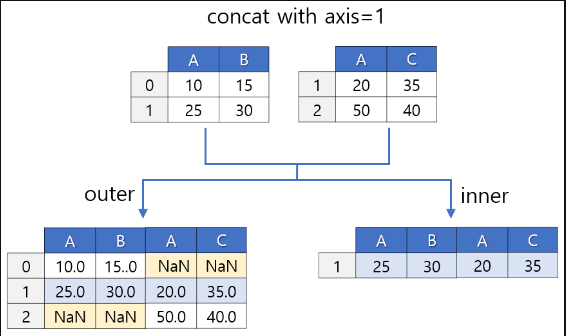

##### - 데이터 읽어오기

In [ ]:
# 서울 인구정보 읽어오기 #1
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h01.csv'
pop01 = pd.read_csv(path, index_col='year')
pop01.index.name = None

# 확인
pop01.head(10)

In [ ]:
# 서울 인구정보 읽어오기 #2
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h02.csv'
pop02 = pd.read_csv(path, index_col='year')
pop02.index.name = None

# 확인
pop02.head(10)

##### - 데이터프레임 합치기
- 이제 **concat()** 함수를 사용해 두 데이터프레임을 합쳐봅니다.
- 가로로 합치므로 **axis=1** 옵션을 지정합니다.
- join='outer'는 기본 옵션값이므로 생략이 가능합니다.

In [ ]:
# axis=0 아래로 붙이기 위+아래
# axis=1 오른쪽에 붙이기 좌+우

In [ ]:
# 모든 행 합치기
# df = pd.concat([df1, df2], join='방법', axis=? )
pop = pd.concat([pop01, pop02], join='outer', axis=1)
    # pop01 은 변수이기에 ''(문자선언) X

# 확인
pop.head()

- pop02 데이터프레임에는 1981~1984년 데이터가 없어 합쳐진 결과에 결측치가 생깁니다.
- join='inner' 옵션을 지정하면 매핑되지 못한 행은 제외됩니다.

In [ ]:
# 모든 헹 합치기
pop = pd.concat([pop01, pop02], join='inner', axis=1)

# 확인
pop.head(10)

$ $


##### 2) 세로로 합치기
- **axis=0** 옵션을 지정해 세로로 합칠 수 있습니다.(기본값)

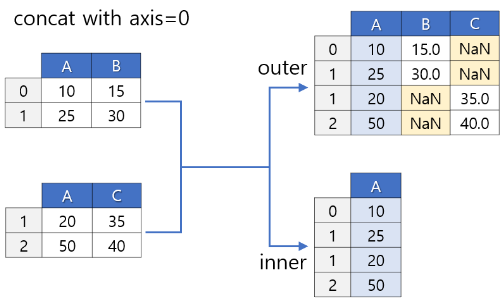

##### - 데이터 읽어오기

In [ ]:
# 서울 인구정보 읽어오기 #1
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_v01.csv'
pop01 = pd.read_csv(path)

# 확인
pop01.head()

In [ ]:
# 서울 인구정보 읽어오기 #2
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_v02.csv'
pop02 = pd.read_csv(path)

# 확인
pop02.head(5)

##### - 데이터프레임 합치기
- 이제 **concat()** 함수를 사용해 두 데이터프레임을 합쳐봅니다.
- 세로로 합치므로 **axis=0** 옵션을 지정하거나 생략합니다.

In [ ]:
# 모든 헹 합치기
pop = pd.concat([pop01, pop02], join='outer', axis=0) 

# 확인
pop.head()

    - 세로로 합해지면 인덱스 값이 중복될 수 있으므로 인덱스 초기화

In [ ]:
# 인덱스 초기화
pop.reset_index(drop=True, inplace=True)

# 확인
pop.head()

    - cf) 인구 변화량 시각화

In [ ]:
# 시각화 1
plt.plot(pop['year'], pop['k_male'])
plt.show()

In [ ]:
# 시각화 2
plt.plot(pop['year'], pop[['k_male', 'k_female']])
plt.legend(['k_male', 'k_female'])
plt.show()

$ $

$ $

# 2. 데이터프레임 조인(Merge)
- **merge()** 함수를 사용 두 데이터프레임을 지정한 키 값을 기준으로 병합할 수 있습니다.

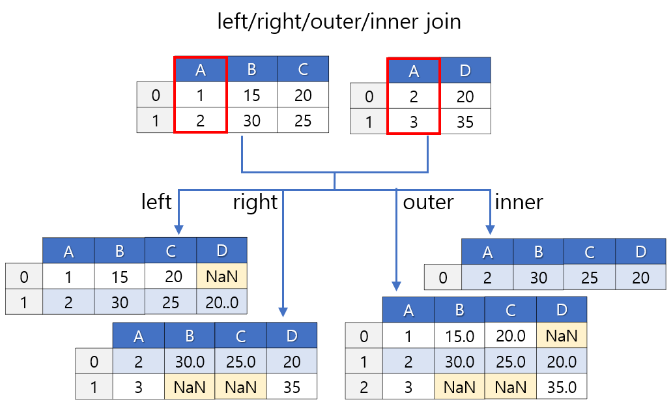

In [ ]:
# inner: 매핑이 되는 행만 가져오기(데이터양 가장 적음)
# outer: 매핑 여부 상관x(데이터양 가장 많음)
# left: 왼쪽열 기준으로 공통된 것만 가져오기
# right: 오른쪽열 기준으로 공통된 것만 가져오기

##### 1) 데이터 읽어오기

In [ ]:
# 서울 인구정보 읽어오기 #1
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h01.csv'
pop01 = pd.read_csv(path)

# 확인
pop01.head(10)

In [ ]:
# 서울 인구정보 읽어오기 #2
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h02.csv'
pop02 = pd.read_csv(path)

# 확인
pop02.head(10)

##### 2) inner 조인
- 같은 이름의 열이 있으면 on 옵션을 지정하지 않아도 그 열을 기준으로 조인됩니다.
- how='inner' 옵션은 기본 옵션값이므로 생략할 수 있습니다.

In [ ]:
# 조인
# merge는 리스트가 올 수 없음.
# df = pd.merge(df1, df2, on='', how='')
pop = pd.merge(pop01, pop02, on='year', how='inner')

# 확인
pop.head()

##### 3) outer 조인
- **how='outer'** 옵션

In [ ]:
# 조인
pop = pd.merge(pop01, pop02, on='year', how='outer')

# 확인
pop.head(10)